# Smart Financial Forecasting System

## 1. Project Goal
## The goal of this project is to build an end-to-end machine learning system that:
## - Analyzes personal financial data
## - Forecasts future expenses
## - Segments users based on financial behavior
## - Detects abnormal spending patterns
## - Provides personalized financial recommendations



## 2. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


## 3. Load Dataset

In [24]:
df = pd.read_excel(r"D:\1.Projects\Python\SmartFinancialForecastingSystem\Data\India_Household_Spending_raw_file.xlsx")
df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

## 4. Data Cleaning

In [19]:
df.isnull().sum()
df = df.dropna()


## 5. Feature Engineering

In [27]:
expense_columns = [
    "Rent",
    "Loan_Repayment",
    "Insurance",
    "Groceries",
    "Transport",
    "Eating_Out",
    "Entertainment",
    "Utilities",
    "Healthcare",
    "Education",
    "Miscellaneous"
]

df["Expenses"] = df[expense_columns].sum(axis=1)

df["Savings"] = df["Income"] - df["Expenses"]
df["Savings_Ratio"] = df["Savings"] / df["Income"]

df[["Income", "Expenses", "Savings", "Savings_Ratio"]].head()


,Income,Expenses,Savings,Savings_Ratio
0,44637.249636,33371.621929,11265.627707,0.252382
1,26858.596592,17181.777859,9676.818733,0.360288
2,50367.605084,36476.154459,13891.450624,0.275801
3,101455.600247,69837.646632,31617.953615,0.311643
4,24875.283548,18609.583016,6265.700532,0.251885


# 6. Exploratory Data Analysis



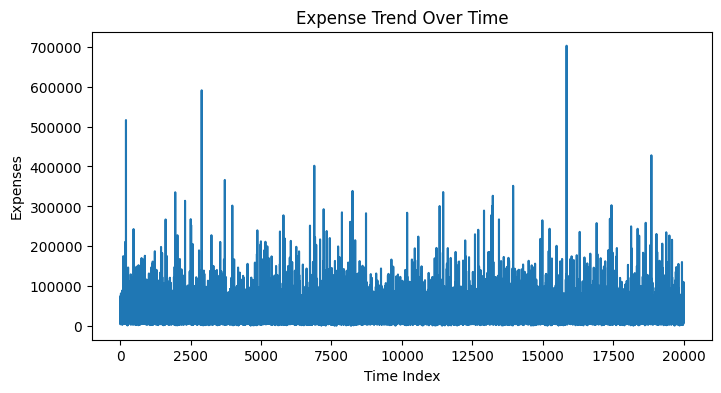

In [28]:
plt.figure(figsize=(8,4))
plt.plot(df.index, df["Expenses"])
plt.title("Expense Trend Over Time")
plt.xlabel("Time Index")
plt.ylabel("Expenses")
plt.show()


# 7. Expense Prediction using Socio-Economic Features

In [32]:
## Prepare Data
# Feature selection
features = [
    "Income",
    "Age",
    "Dependents",
    "Rent",
    "Groceries",
    "Transport",
    "Eating_Out",
    "Entertainment",
    "Utilities"
]

X = df[features]
y = df["Savings"]

X.head(), y.head()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))

## Random Forest 

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))

## Savings Prediction Insight

## Savings prediction resulted in slightly lower performance compared to expense prediction due to behavioral variability in discretionary spending. However, the model still achieved strong predictive accuracy, demonstrating meaningful financial patterns in the data.



Linear Regression R2: 0.887143836336118
Linear Regression MSE: 17754232.2486523
Random Forest MSE: 28920068.971046284
Random Forest R2: 0.8161673233031576


# 8. Customer Segmentation & Elbow Method

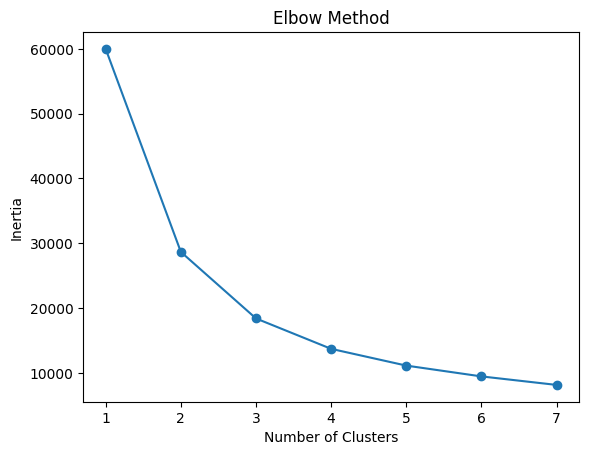

,Income,Expenses,Savings
Cluster,,,
0,25066.036284,18847.073126,6218.963158
1,78794.323896,58298.266982,20496.056915
2,201384.841963,146870.773279,54514.068684


In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["Income","Expenses","Savings"]])

inertia = []
for k in range(1,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(1,8), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Final Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

df.groupby("Cluster")[["Income","Expenses","Savings"]].mean()


# 9. Anomaly Detection & Recommendation System

In [35]:
iso = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso.fit_predict(df[["Expenses"]])

df[df["Anomaly"] == -1].head()

def recommend(cluster):
    if cluster == 0:
        return "Reduce expenses and improve savings discipline"
    elif cluster == 1:
        return "Maintain balance and start long-term investments"
    else:
        return "Explore high-return investment opportunities"

df["Recommendation"] = df["Cluster"].apply(recommend)
df.head()

## Save Output
df.to_csv("SmartFinancial_Output.csv", index=False)
print("Saved Sucessfully")


Saved Sucessfully


## Save Model

In [36]:
import pickle


MODEL_FEATURES = [
    "Income",
    "Rent",
    "Loan_Repayment",
    "Groceries",
    "Transport",
    "Utilities",
    "Healthcare",
    "Education",
    "Entertainment",
    "Miscellaneous"
]

X = df[MODEL_FEATURES]
y = df["Savings"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


with open("linear_regression_savings.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as linear_regression_savings.pkl")


Model saved as linear_regression_savings.pkl
